In [118]:
import pandas as pd

In [119]:
df = pd.read_csv('https://drive.google.com/uc?id=1LFpRkxMx5G4XUX72bT6didadl1Gf1bAm')

In [120]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [121]:
df.shape

(12283, 12)

In [122]:
len(df.fullVisitorId.unique())

9996

In [123]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [124]:
df = pd.read_csv('https://drive.google.com/uc?id=1LFpRkxMx5G4XUX72bT6didadl1Gf1bAm', dtype={'date':object,'fullVisitorId':object,'VisitId':object})

In [125]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [126]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [127]:
type(df.device.iloc[0])

str

In [128]:
import json

In [129]:
type(json.loads(df.device.iloc[0]))

dict

In [130]:
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

In [131]:
pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [132]:
dicionarios = ['device','geoNetwork','trafficSource','totals']

In [133]:
for coluna in dicionarios:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [134]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [135]:
df.drop(dicionarios, axis=1, inplace=True)

In [136]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

In [137]:
len(df.channelGrouping.unique())

8

In [138]:
df.drop('adwordsClickInfo', axis=1, inplace=True)

In [139]:
coluna_na = []

In [140]:
for coluna in df.columns:
  print(coluna + ': ' + str(len(df[coluna].unique())))
  if len(df[coluna].unique()) == 1:
    coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [141]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [142]:
df.drop(coluna_na, axis=1, inplace=True)

In [143]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


In [144]:
df.shape

(12283, 31)

In [145]:
quant = ['bounces','hits','newVisits','pageviews','transactionRevenue']

In [146]:
for coluna in quant:
  df[coluna] = pd.to_numeric(df[coluna])

In [147]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

In [148]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


In [149]:
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [150]:
df.transactionRevenue.isna().sum()

12119

In [151]:
df.shape

(12283, 31)

In [152]:
df.transactionRevenue.fillna(0, inplace=True)

In [153]:
df.transactionRevenue.value_counts()

0.0            12119
33590000.0         3
13590000.0         3
19190000.0         3
31490000.0         2
               ...  
374850000.0        1
74850000.0         1
291070000.0        1
23960000.0         1
372650000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

In [154]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [155]:
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

In [156]:
df.shape

(12283, 31)

In [157]:
len(set(df.fullVisitorId))

9997

In [158]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()

In [159]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [160]:
df_quant.shape

(9997, 6)

# Aula 03


In [161]:
y = df_quant.transactionRevenue.copy()

In [162]:
X = df_quant.drop('transactionRevenue', axis=1)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =42)

In [165]:
X_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [166]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

In [167]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(6997, 5)
(6997,)
(3000, 5)
(3000,)


In [168]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [169]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
reg_predict = reg.predict(X_test)

In [171]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [172]:
resultados = pd.DataFrame()

In [173]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [174]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [175]:
resultados.query('revenue > 0')

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


In [176]:
import numpy as np

## MSE

In [177]:
np.mean((reg_predict - y_test)**2)

807.245929682092

## RMSE

In [178]:
np.sqrt(np.mean((reg_predict - y_test)**2))

28.412073660366502

In [179]:
from sklearn.metrics import mean_squared_error

In [180]:
mean_squared_error(y_test, reg_predict)

807.2459296820928

In [181]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [182]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [183]:
np.std(df_quant.transactionRevenue)

25.129905708017944

### 04 Análise gráfica dos resultados

In [184]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


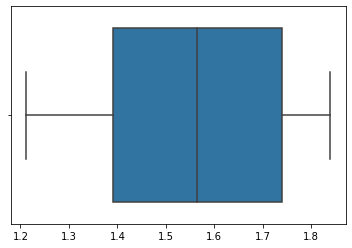

In [185]:
sns.boxplot(reg_predict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


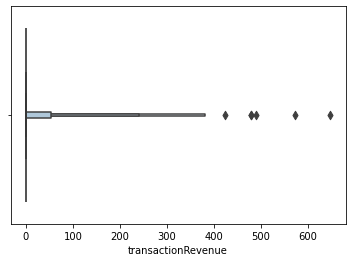

In [186]:
sns.boxenplot(y_test)

In [187]:
error = reg_predict - y_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


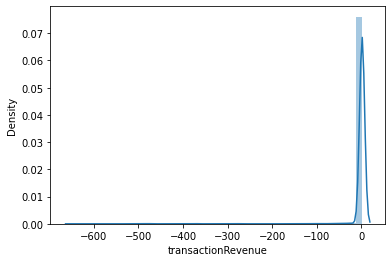

In [188]:
sns.distplot(error)

# Aula 04

In [189]:
visitas_ultima = df.groupby('fullVisitorId',as_index=False)

In [190]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [191]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [192]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [193]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [194]:
usuarios_visitas_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [195]:
usuarios_visitas_unicos.shape

(12270, 31)

In [196]:
visitas = pd.merge(visitas_ultima,
                   usuarios_visitas_unicos,
                   left_on=['fullVisitorId','visitNumber'],
                   right_on=['fullVisitorId','visitNumber'],
                   how='left')

In [197]:
visitas.shape

(9997, 31)

In [198]:
visitas_primeira = df.groupby('fullVisitorId', as_index=False)

In [199]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [200]:
visitas_primeira.set_index('fullVisitorId', inplace=True)

In [201]:
visitas_primeira.head()

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [202]:
visitas = visitas.join(visitas_primeira,
                       how='left',
                       on='fullVisitorId',
                       rsuffix='_primeira')

In [203]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [204]:
visitas = pd.merge(visitas,
                   usuarios_visitas_unicos,
                   left_on=['fullVisitorId','visitNumber_primeira'],
                   right_on=['fullVisitorId','visitNumber'],
                   how='left',
                   suffixes=['_ultima','_primeira'])

In [205]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

In [206]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [207]:
for coluna in quant:
  visitas.drop(coluna + '_ultima', axis=1, inplace=True)
  visitas.drop(coluna + '_primeira', axis=1, inplace=True)

In [208]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [209]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira','visitId_primeira']

In [210]:
visitas.drop(ids, axis=1, inplace=True)

In [211]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [212]:
visitas.shape

(9997, 48)

In [213]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'mediu

In [214]:
geo = ['city_primeira','continent_primeira','country_primeira','metro_primeira','region_primeira',
      'networkDomain_primeira','subContinent_primeira']

In [215]:
visitas.drop(geo, axis=1, inplace=True)

In [216]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [217]:
visitas.shape

(9997, 41)

In [218]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [219]:
visitas = pd.merge(visitas, df_quant,
                   left_on=['fullVisitorId'],
                   right_on=['fullVisitorId'],
                   how='left')

In [220]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [221]:
visitas.shape

(9997, 46)

In [222]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [223]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


In [224]:
visits = df.groupby('fullVisitorId', as_index=False).count().visitNumber.values

In [225]:
visitas['visits'] = visits

In [226]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [227]:
data = '20160904'

In [228]:
data

'20160904'

In [229]:
data[0:4]

'2016'

In [230]:
data[4:6]

'09'

In [231]:
data[6:]

'04'

In [232]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

In [233]:
visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [234]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [235]:
visitas.drop('fullVisitorId', axis = 1, inplace=True)

In [236]:
y = visitas.transactionRevenue.copy()

In [237]:
X = visitas.drop('transactionRevenue', axis = 1)

In [238]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [239]:
X.shape

(9997, 52)

In [241]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [242]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primeira', 'date_primeira',
       'browser_primeira', 'operatingSystem_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

In [243]:
from sklearn.preprocessing import LabelEncoder

In [253]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [254]:
lbl = LabelEncoder()

In [255]:
lbl.fit(strings)

LabelEncoder()

In [256]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [258]:
for coluna in quali:
  lbl = LabelEncoder()
  strings = list(X[coluna].values.astype('str'))
  lbl.fit(strings)
  X[coluna] = lbl.transform(strings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [259]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =42)

In [261]:
reg = LinearRegression()

In [262]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
reg_predict = reg.predict(X_test)

In [266]:
reg_predict[reg_predict < 0] = 0

In [267]:
resultados = pd.DataFrame()

resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [268]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.247513,0.247513
6391,0.0,0.000000,0.000000


In [269]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.464323,-18.025677
5928,74.85,36.179521,-38.670479
8361,424.50,18.263302,-406.236698
8612,55.99,16.243607,-39.746393
416,15.19,22.472985,7.282985
4077,5.97,15.058227,9.088227
8146,27.19,13.376883,-13.813117
4908,372.65,129.416836,-243.233164
9395,29.98,20.508505,-9.471495
8728,101.95,88.954637,-12.995363


In [271]:
np.sqrt(mean_squared_error(y_test, reg_predict))

25.02188996701886

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


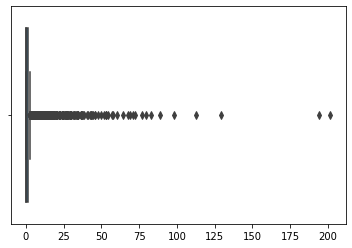

In [272]:
sns.boxplot(reg_predict)

# Gradient Boosting

In [273]:
from sklearn.ensemble import GradientBoostingRegressor

In [275]:
gb = GradientBoostingRegressor(random_state=42)

In [276]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [277]:
gb_predict = gb.predict(X_test)

In [278]:
gb_predict

array([ 0.03258195, -0.00624834, -0.01145717, ...,  0.33309813,
       -0.01397378, -0.01372323])

In [279]:
gb_predict[gb_predict < 0] = 0

In [280]:
gb_predict

array([0.03258195, 0.        , 0.        , ..., 0.33309813, 0.        ,
       0.        ])

In [281]:
resultados = pd.DataFrame()

resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [282]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.464323,-18.025677
5928,74.85,36.179521,-38.670479
8361,424.50,18.263302,-406.236698
8612,55.99,16.243607,-39.746393
416,15.19,22.472985,7.282985
4077,5.97,15.058227,9.088227
8146,27.19,13.376883,-13.813117
4908,372.65,129.416836,-243.233164
9395,29.98,20.508505,-9.471495
8728,101.95,88.954637,-12.995363


In [283]:
np.sqrt(mean_squared_error(y_test,gb_predict))

23.09413632899293